Back to the [ML Notebook](./ml.ipynb)

Back to the [Random Forest Notebook](./random-forest.ipynb)

To the [README](./README.md)

--------------------------------------------------------------------------------

# Random Forest+

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

# set the theme for seaborn graphics
sns.set_theme(context='paper', style='whitegrid')

In [2]:
# load the training and testing data
df_train = [
    pd.read_csv(f'data/df_train_with_hist_{loc}.csv', index_col=0)
    for loc in range(1, 5)
]
df_test = [
    pd.read_csv(f'data/df_test_with_hist_{loc}.csv', index_col=0)
    for loc in range(1, 5)
]

In [3]:
# define target and features
X_train = [
    df_train[0].drop('Power', axis=1),
    df_train[1].drop('Power', axis=1),
    df_train[2].drop('Power', axis=1),
    df_train[3].drop('Power', axis=1),
]
y_train = [
    df_train[0].Power,
    df_train[1].Power,
    df_train[2].Power,
    df_train[3].Power,
]

X_test = [
    df_test[0].drop('Power', axis=1),
    df_test[1].drop('Power', axis=1),
    df_test[2].drop('Power', axis=1),
    df_test[3].drop('Power', axis=1),
]
y_true = [
    df_test[0].Power,
    df_test[1].Power,
    df_test[2].Power,
    df_test[3].Power,
]

In [4]:
# instantiate Random Forest regressor
forest = [RandomForestRegressor(n_jobs=-1) for _ in range(4)]

In [5]:
# train the model
def model(collection): return collection[0]
def X(collection): return collection[1]
def y(collection): return collection[2]
_ = list(map(
    lambda z: model(z).fit(X(z), y(z)),
    zip(forest, X_train, y_train)
))

In [6]:
# make predictions
y_test = list(map(
    lambda z: model(z).predict(X(z)),
    zip(forest, X_test)
))

In [7]:
# evaluate results
errors = list(map(
    lambda z: root_mean_squared_error(z[0], z[1]),
    zip(y_true, y_test)
))

# display the errors:
for location, error in zip([n+1 for n in range(4)], errors):
    print(f'Location {location}:\tRMSE = {error:.3f}')

Location 1:	RMSE = 0.012
Location 2:	RMSE = 0.010
Location 3:	RMSE = 0.012
Location 4:	RMSE = 0.011


This is a *significant* improvement compared to the previous scores:

    Location 1:	RMSE = 0.130
    Location 2:	RMSE = 0.090
    Location 3:	RMSE = 0.106
    Location 4:	RMSE = 0.095

And the higher prediction accuracy also shows in the grahical representation
as well:

In [8]:
# create a result dataframe for evaluation and graphical display
df_test[0]['Location'] = 'Location 1'
df_test[0]['predicted'] = y_test[0]
df_test[0].rename(columns={'Power': 'actual'}, inplace=True)

df_test[1]['Location'] = 'Location 2'
df_test[1]['predicted'] = y_test[1]
df_test[1].rename(columns={'Power': 'actual'}, inplace=True)

df_test[2]['Location'] = 'Location 3'
df_test[2]['predicted'] = y_test[2]
df_test[2].rename(columns={'Power': 'actual'}, inplace=True)

df_test[3]['Location'] = 'Location 4'
df_test[3]['predicted'] = y_test[3]
df_test[3].rename(columns={'Power': 'actual'}, inplace=True)

results = pd.concat(df_test, axis=0)

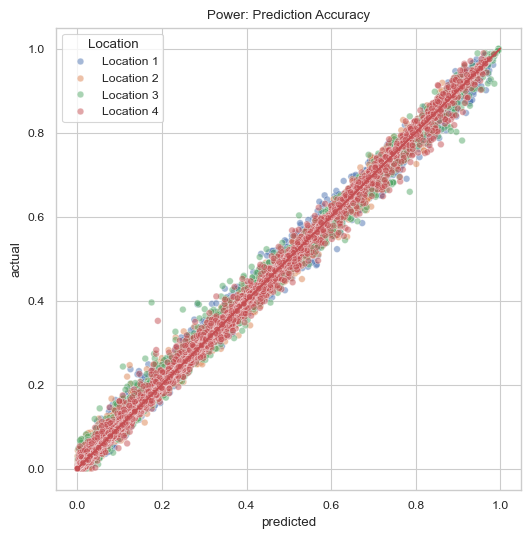

In [9]:
# graphical visualization
plt.figure(figsize=(6,6))
sns.scatterplot(results, x='predicted', y='actual', hue='Location', alpha=.5)
plt.plot([[0,0], [1,1]], color='r')
plt.title('Power: Prediction Accuracy')
plt.show()

Despite its simplicity, Random Forest can predict quite accurate power levels
on this modified dataset!  The prediction errors are spread quite symmetrically
around the true values; there is no systematic over- or undershooting detectable.

Surely, the two new features turn out to be the most significant for the model
to learn from:

In [10]:
pd.DataFrame(
    zip(X_test[0].columns, forest[0].feature_importances_),
    columns=['feature', 'importance']
).sort_values('importance', ascending=False)

,feature,importance
20,PastPower,0.966750
21,PastSlope,0.031559
12,Hour_s,0.000280
13,Hour_c,0.000203
18,windspeed_100m_n,0.000153
15,relativehumidity_2m_n,0.000101
17,windspeed_10m_n,0.000100
19,windgusts_10m_n,0.000096
10,Day of Year_s,0.000093
11,Day of Year_c,0.000086


What's interesting when compared with the original ranking is that now the
time of day became more important than the actual meteorological data;
the two `Hour_X` columns rank higher than `windspeed_X` and `relativehumidity_X`.
This is probably due to the fact that Random Forest now primarily learns the
timely behaviour (like a "schedule") of the power plants, not the underlying
physics responsible for it.  At least not directly, as one can argue that
the previous power level and power slope basically encodes/ evaluates the
most recent weather conditions in two simple, plain numbers.

--------------------------------------------------------------------------------

To the [Artificial Neural Network Notebook](./ann.ipynb)

Back to the [ML Notebook](./ml.ipynb)

Back to the [README](./README.md)